# Particle Representation

With the different aspects of particles laid out in the previous sections, we can now focus on how to represent them in a simulation. The representation of particles is crucial for having a unified way to handle particles in a system. This section will discuss building a particle representation that can be used in simulations and analyses.




In [22]:
import numpy as np
import matplotlib.pyplot as plt

from particula.next import particles

## Builder: Particle Representation

In this section, we will demonstrate how to create a particle distribution using specific particle properties such as radius, density, and concentration. This example will help illustrate the practical application of object-oriented programming in simulating and analyzing particle systems in scientific research. We'll utilize a builder pattern to construct an instance of a Particle class, allowing for flexible configuration of particle characteristics and behaviors.

Key Components:

- Radius and Concentration: Define the size and number of particles in nanometers and their concentration per cubic centimeter, respectively.
Density and Surface Tension: Specify the material's density and the surface tension for the particles, which are critical for calculating various physical and chemical properties.
- Builder Pattern: Use a builder pattern for creating a particle representation, which facilitates the step-by-step configuration of different strategies for distribution, activity, and surface approximations.

The code snippet below sets up a particle distribution with defined properties using multiple factory methods to specify behavior strategies for distribution, activity, and surface interactions. The use of a builder pattern enhances readability and maintainability of the code by separating the construction of a complex object from its representation.

In [23]:
# Creating particle distribution examples
radius = np.array([100, 200, 300], dtype=np.float64)  # in nm
density = 2.5
concentration = np.array([1e2, 1e3, 1e4], dtype=np.float64)

# parameters
sufrace_tension_strategy = (
    particles.SurfaceStrategyMassBuilder()
    .set_surface_tension(0.072)
    .set_density(2.5, "g/cm^3")
)

# Create a Particle instance using the RadiusParticleRepresentationBuilder
particle_rep_mass = (
    particles.ParticleRadiusRepresentationBuilder()
    .set_distribution_strategy(particles.RadiiBasedMovingBin())
    .set_activity_strategy(particles.ActivityIdealMass())
    .set_surface_strategy(sufrace_tension_strategy)
    .set_concentration(concentration=concentration, concentration_units="1/cm^3")
    .set_density(density=density, density_units="g/cm^3")
    .set_radius(radius=radius, radius_units="nm")
    .set_charge(charge=0)
    .build()
)

#Accessing calculated properties
print("Mass of particles:", particle_rep_mass.get_mass())
print("Radius of particles:", particle_rep_mass.get_radius())
print("Total mass of the particle distribution:", particle_rep_mass.get_mass_concentration())

Mass of particles: [1.04719755e-17 8.37758041e-17 2.82743339e-16]
Radius of particles: [1.e-07 2.e-07 3.e-07]
Total mass of the particle distribution: 2.912256389877738e-06


## Factory: Particle Representation Implementation

The factory pattern plays a crucial role in the flexibility and extensibility of particle property computations, such as mass, radius, and total mass, within different computational models. It allows for dynamic selection of computational strategies based on the scenario, facilitating accurate and tailored simulations of real-world conditions.

In this section, we'll demonstrate how to use a factory to construct speciated particles characterized by varied properties, enhancing our ability to simulate diverse environmental scenarios. Initially, it's beneficial to directly manipulate builders to familiarize yourself with various strategies. Subsequently, parameters can be saved in JSON format. In future iterations, these saved configurations can be rapidly deployed through the factory, streamlining particle creation and modification.


Total mass of the particle distribution: 0.18691117766964574


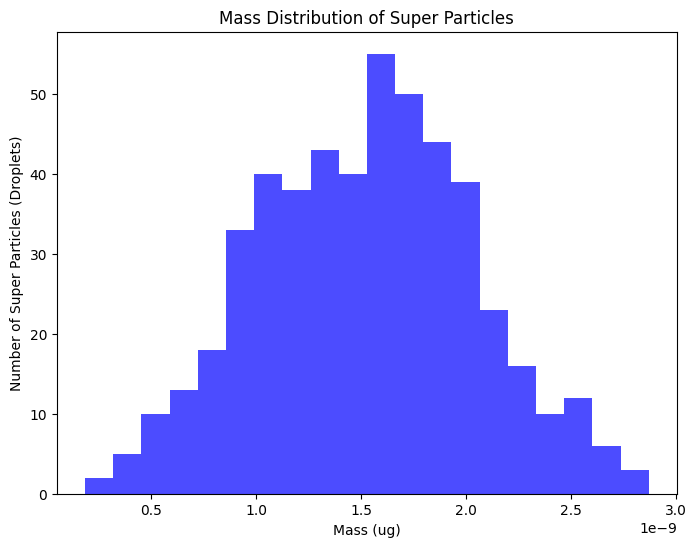

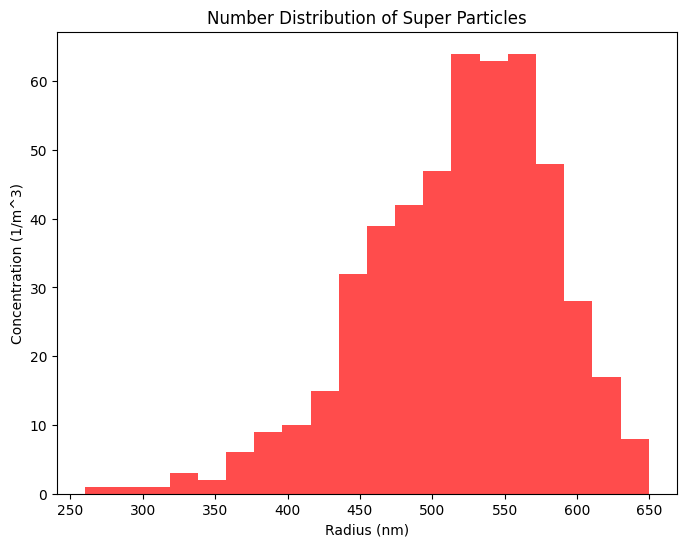

In [24]:
# Generating random properties for speciated particles
mass_distribution = (
    np.random.rand(500, 3).astype(np.float64)
)
concentration = (
    np.random.rand(500, 1).astype(np.float64) * 1e3
)

# Defining surface tension parameters
surface_tension_parameter = {
    "surface_tension": 0.072,  # in N/m
    "density": 2.5,  # Density in g/cm^3
    "density_units": "g/cm^3",
}
surface_strategy = particles.SurfaceFactory().get_strategy('mass', surface_tension_parameter)
distribution_strategy = particles.DistributionFactory().get_strategy('speciated_mass_moving_bin')
activity_strategy = particles.ActivityFactory().get_strategy('mass_ideal')

# Setting up parameters for the particle representation factory
parameters = {
    "distribution_strategy": distribution_strategy,
    "activity_strategy": activity_strategy,
    "surface_strategy": surface_strategy,
    "density": 2.5,
    "density_units": "g/cm^3",
    "concentration": concentration,
    "concentration_units": "1/cm^3",
    "mass": mass_distribution,
    "mass_units": "pg",  # picograms
    "charge": 0,
}

# Using the factory to create a speciated particle representation
speciated_mass_rep = particles.ParticleRepresentationFactory().get_strategy(
    "mass", parameters
)

# Outputting the total mass of the particle distribution
print(
    f"Total mass of the particle distribution: {speciated_mass_rep.get_mass_concentration()}"
)

# Plot histogram of the mass distribution and number distribution vs radius
radius = speciated_mass_rep.get_radius()
masses = speciated_mass_rep.get_mass()
concentration = speciated_mass_rep.get_concentration(clone=True)


fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(masses*1e6, bins=20, color="blue", alpha=0.7)
ax.set_xlabel("Mass (ug)")
ax.set_ylabel("Number of Super Particles (Droplets)")
ax.set_title("Mass Distribution of Super Particles")
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.hist(radius*1e9, bins=20, color="red", alpha=0.7)
ax2.set_ylabel("Concentration (1/m^3)")
ax2.set_xlabel("Radius (nm)")
ax2.set_title("Number Distribution of Super Particles")
plt.show()

## Limited Representation Builder

The last representation, is a modification of the radii builder, where we can specify a lognomal distribution parameters. This is useful when we want a to start a simulation quick and are not trying to explicitly reproduce a specific system.

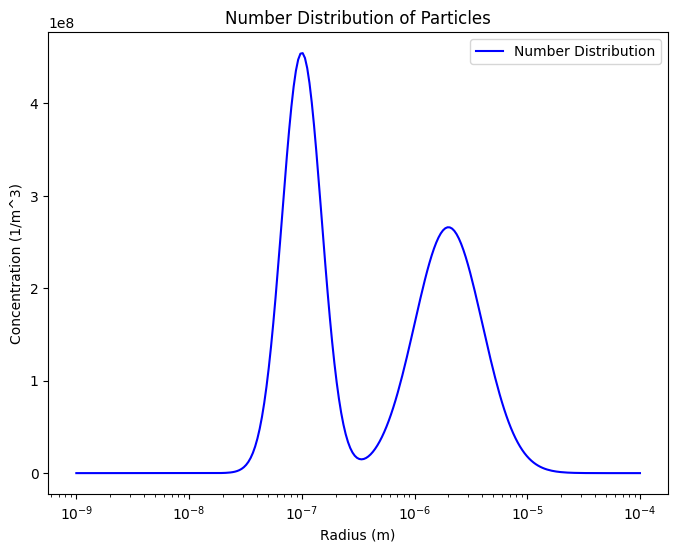

In [25]:

lognormal_rep = (
    particles.PresetParticleRadiusBuilder()
    .set_mode(np.array([100, 2000]), "nm")
    .set_geometric_standard_deviation(np.array([1.5, 2.0]))
    .set_number_concentration(np.array([1e4, 1e4]), "1/cm^3")
    .set_distribution_type("pmf")
    .build()
)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.semilogx(lognormal_rep.get_radius(), lognormal_rep.get_concentration(), label="Number Distribution", color="blue")
ax.set_xlabel("Radius (m)")
ax.set_ylabel("Concentration (1/m^3)")
ax.set_title("Number Distribution of Particles")
plt.legend()
plt.show()

## Summary

In this notebook, we have discussed the importance of particle representation in simulations and analyses. We have demonstrated how to create a particle distribution using specific particle properties such as radius, density, and concentration. We have also shown how to use a builder pattern to construct an instance of a Particle class, allowing for flexible configuration of particle characteristics and behaviors. Finally, we have discussed the factory pattern and how it can be used to construct speciated particles characterized by varied properties.